In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.ensemble import RandomForestClassifier
import pickle
from imblearn.over_sampling import  SMOTE


Ładowanie danych

In [80]:
data = pd.read_csv('../Data/epl_dataset.csv')

In [81]:
data['HomeTeam'].unique()

array(['Crystal Palace', 'Fulham', 'Bournemouth', 'Leeds', 'Newcastle',
       'Tottenham', 'Everton', 'Leicester', 'Man United', 'West Ham',
       'Aston Villa', 'Arsenal', 'Brighton', 'Man City', 'Southampton',
       'Wolves', 'Brentford', "Nott'm Forest", 'Chelsea', 'Liverpool'],
      dtype=object)

In [82]:
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,H_Ranking_Prior_Season,A_Ranking_Prior_Season,FTHG,FTAG,FTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,12,5,0,2,A,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,18,2,2,2,D,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,18,14,2,0,H,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,17,10,2,1,H,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,11,18,2,0,H,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86


In [83]:
null_percentages = data.isnull().mean() * 100
print(null_percentages[null_percentages > 0])

P>2.5     0.263158
P<2.5     0.263158
PC>2.5    0.263158
PC<2.5    0.263158
dtype: float64


In [84]:
data = data[['Date','Time','HomeTeam','AwayTeam','H_Ranking_Prior_Season','A_Ranking_Prior_Season','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','Referee','B365H','B365D','B365A']]

Opis Kolumn
1.  Date = match date
2.  Time = time of kickoff
3.  HomeTeam
4.  AwayTeam
5.  H_Ranking_Prior_Season = home ranking previous season
6.  A_Ranking_Prior_Season = away ranking previous season
7.  FTHG = Full Time Home Team Goals
8.  FTAG = Full Time Away Team Goals
9.  FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
10. HTHG = Half Time Home Team Goals
11. HTAG = Half Time Away Team Goals
12. HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
13. HS = Home Team Shots
14. AS = Away Team Shots
15. Referee = Match Referee
16. B365H = Bet365 home win odds
17. B365D = Bet365 draw odds
18. B365A = Bet365 away win odds


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    380 non-null    object 
 1   Time                    380 non-null    object 
 2   HomeTeam                380 non-null    object 
 3   AwayTeam                380 non-null    object 
 4   H_Ranking_Prior_Season  380 non-null    int64  
 5   A_Ranking_Prior_Season  380 non-null    int64  
 6   FTHG                    380 non-null    int64  
 7   FTAG                    380 non-null    int64  
 8   FTR                     380 non-null    object 
 9   HTHG                    380 non-null    int64  
 10  HTAG                    380 non-null    int64  
 11  HTR                     380 non-null    object 
 12  HS                      380 non-null    int64  
 13  AS                      380 non-null    int64  
 14  Referee                 380 non-null    ob

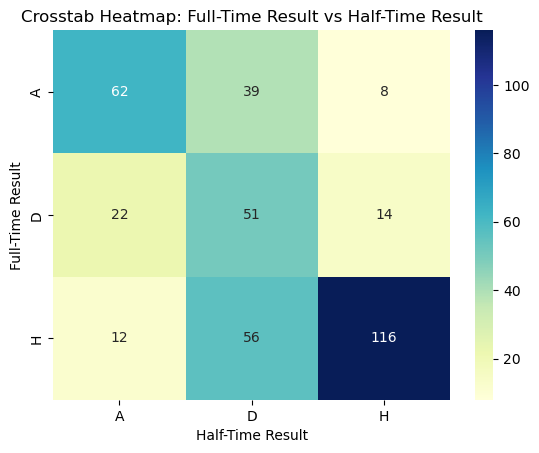

In [86]:
crosstab = pd.crosstab(data['FTR'], data['HTR'])

# Create seaborn heatmap
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")

# Add labels and title
plt.xlabel('Half-Time Result')
plt.ylabel('Full-Time Result')
plt.title('Crosstab Heatmap: Full-Time Result vs Half-Time Result')

# Display the plot
plt.show()

In [87]:
data = data.drop(columns = ['Date','Time','Referee','FTHG','FTAG'])

In [88]:
data.columns

Index(['HomeTeam', 'AwayTeam', 'H_Ranking_Prior_Season',
       'A_Ranking_Prior_Season', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS',
       'B365H', 'B365D', 'B365A'],
      dtype='object')

Kodowanie danych kategorycznych

In [89]:
encoder = OneHotEncoder(sparse=False)

# Fit and transform the encoder on the selected columns
encoded_columns = encoder.fit_transform(data[['HomeTeam', 'AwayTeam', 'HTR']])

# Get the feature names from the encoder
feature_names = encoder.get_feature_names_out(input_features=['HomeTeam', 'AwayTeam', 'HTR'])

# Create a DataFrame with the encoded columns
data_encoded = pd.DataFrame(encoded_columns, columns=feature_names)

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
data_encoded = pd.concat([data.drop(columns=['HomeTeam', 'AwayTeam', 'HTR']), data_encoded], axis=1)


c:\Users\bruno\anaconda3\envs\suml_proj\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [90]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   H_Ranking_Prior_Season   380 non-null    int64  
 1   A_Ranking_Prior_Season   380 non-null    int64  
 2   FTR                      380 non-null    object 
 3   HTHG                     380 non-null    int64  
 4   HTAG                     380 non-null    int64  
 5   HS                       380 non-null    int64  
 6   AS                       380 non-null    int64  
 7   B365H                    380 non-null    float64
 8   B365D                    380 non-null    float64
 9   B365A                    380 non-null    float64
 10  HomeTeam_Arsenal         380 non-null    float64
 11  HomeTeam_Aston Villa     380 non-null    float64
 12  HomeTeam_Bournemouth     380 non-null    float64
 13  HomeTeam_Brentford       380 non-null    float64
 14  HomeTeam_Brighton        3

In [91]:
data_encoded['FTR'] = data_encoded['FTR'].replace({'H': 0, 'D': 1, 'A': 2})

In [92]:
y = data_encoded['FTR'] # target variable (winning team)
X = data_encoded.drop(columns = ['FTR'])

Balansowanie danych za pomoca procedury SMOTE

In [93]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,stratify=y_smote ,test_size=0.3, random_state=0)

Drzewo decyzyjne

In [95]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)

[Text(0.5769230769230769, 0.875, 'x[51] <= 0.988\ngini = 0.667\nsamples = 386\nvalue = [128, 129, 129]'),
 Text(0.3076923076923077, 0.625, 'x[49] <= 0.149\ngini = 0.619\nsamples = 281\nvalue = [44, 115, 122]'),
 Text(0.15384615384615385, 0.375, 'x[43] <= 0.012\ngini = 0.636\nsamples = 145\nvalue = [36, 69, 40]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'x[8] <= 5.705\ngini = 0.519\nsamples = 136\nvalue = [8, 46, 82]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'x[5] <= 18.5\ngini = 0.338\nsamples = 105\nvalue = [84, 14, 7]'),
 Text(0.7692307692307693, 0.375, 'x[8] <= 4.1\ngini = 0.222\nsamples = 90\nvalue = [79, 6, 5]'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 0.375, 'gini = 0.587\nsamples = 15\nvalue = [5, 8, 

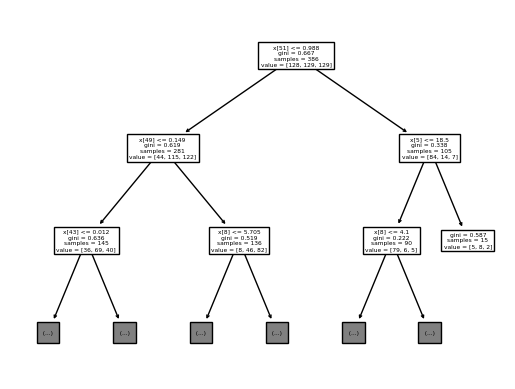

In [96]:
sklearn.tree.plot_tree(tree,max_depth=2)

In [97]:
print('Tree accuracy on train set: ', round(tree.score(X_train,y_train),3))
print('Tree accuracy on test set: ', round(tree.score(X_test,y_test),3))

Tree accuracy on train set:  0.64
Tree accuracy on test set:  0.633


In [114]:
forest = RandomForestClassifier(n_estimators=150, max_depth=4, min_samples_leaf=10)
forest.fit(X_train,y_train)
print('Random forest accuracy on train set: ', round(forest.score(X_train,y_train),3))
print('Random Forest accuracy on test set: ', round(forest.score(X_test,y_test),3))


Random forest accuracy on train set:  0.681
Random Forest accuracy on test set:  0.669


Model XGBoost

In [110]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost classifier with hyperparameters
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # For binary classification
    max_depth=5,                  # Maximum tree depth
    learning_rate=0.005,            # Learning rate
    n_estimators=100,             # Number of trees (boosting rounds)
    subsample=0.8,                # Subsample ratio of the training instances
    colsample_bytree=0.8,
    reg_alpha=0.5,              # L1 regularization term
    reg_lambda=1,             # Subsample ratio of features
    random_state=42               # Random state for reproducibility
)

# Fit the XGBoost model to the training data
xgb_classifier.fit(X_train, y_train)

# Predictions on the training set
train_preds = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print('XGBoost accuracy on train set: ', round(train_accuracy, 3))

# Predictions on the test set
test_preds = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print('XGBoost accuracy on test set: ', round(test_accuracy, 3))

XGBoost accuracy on train set:  0.847
XGBoost accuracy on test set:  0.723


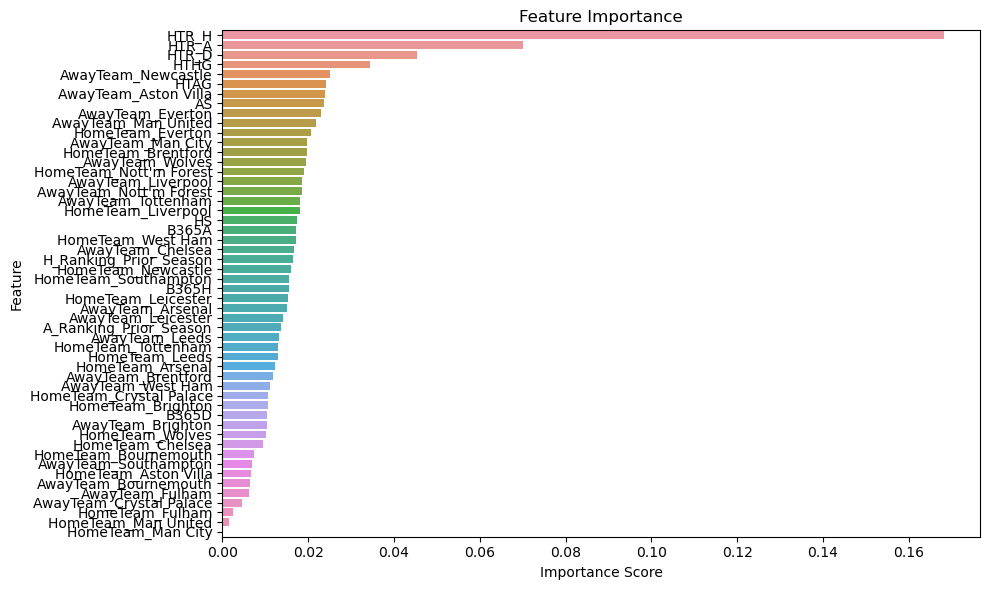

In [104]:
feature_importance = xgb_classifier.feature_importances_

# Get feature names
feature_names = xgb_classifier.get_booster().feature_names

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()


Zapisanie artefaktów

In [107]:
with open('../model/model.pkl', 'wb') as f:
    pickle.dump(forest, f)

In [108]:
with open('../model/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)